In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]} 
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]) 
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$




## Topologia de la red.

1. Construir un algorítmo que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa:

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

activation=[None, relu, relu, relu, ...,sigmoid]

  - $\mathrm{n_x}$: valores de entrada
  - $\mathrm{n_{h1}}$: hidden layer 1 
  - $\mathrm{n_{h2}}$: hidden layer 2
  - $\mathrm{n_y}$: last layer 



Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```
    

2. Construir un generalizacion de la red, en el que entrada el valor inicial 
y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

  ```
  A, nn = forward_pass(A0, nn_red)

 ```
3. Encontrar la funcion de coste.


$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


4. Construir un codigo que permita realizar el BackwardPropagation 


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) 
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima: 

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$


In [2]:
class layer_nn():
  """
  Definición de la capas de la red neuronal 
  e inicializacion de parametros. 
  """

  def __init__(self,act_fun, n_layer_present, n_layer_before ):    
    self.W = 2*np.random.random((n_layer_before,n_layer_present)) - 1
    self.B = 2*np.random.random((n_layer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z,A, Ap):
    self.Z = Z
    self.A = A
    self.Ap = Ap

  def derivates(self, dW, db):
    self.dW = dW
    self.db = db

@np.vectorize
def relu(x):
  if(x>=0):
    return x
  else :
    return 0

@np.vectorize
def reluP(x):
  if(x>=0):
    return 1
  else :
    return 0

def sigmoide(x):      
  f= lambda x: 1/(1+np.exp(-x))
  return f(x)

def act_function(x, activation):        
    if activation == "sigmoid":
        f = sigmoide(x)
        fp = sigmoide(x)*(1-sigmoide(x))
    elif activation == "tanh":
        f = lambda x: np.tanh(x)

    elif activation == "relu":
        f = relu(x)
        fp = reluP(x)
    
    return f, fp
    

def forward_pass(input, nn_red):
  A0 = input  
  nn_red_update = []
  
  for layer in nn_red: 
    Z = layer.W.T@A0 + layer.B    
    A, Ap = act_function(Z, layer.act_fun)        
    layer.output(Z, A, Ap)    
    nn_red_update.append(layer)
    A0 = A        
  return A, nn_red_update


def cost_Function(A, Y):
  m = Y.shape[0]
  m_ = 1/m
  cost = Y*np.log(A)+(1-Y)*np.log(1-A)
  cost = -m_*cost.sum()
  return cost

def backward_propagation(AL,Y,nn):
  L = len(nn) - 1
  
  dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
  fp = nn[L].Ap 
  dZ = dAL*fp  
  m_ = 1/np.shape(Y)[0]

  dW_L = m_*dZ@nn[L-1].Ap.T
  db_L = m_*np.sum(dZ, axis=1, keepdims=True)

  nn[L].dW=dW_L
  nn[L].db=db_L

  dAL_1 = np.dot(nn[L].W, dZ)

  for l in reversed(range(1,L)):
#    dAL_1 = dAL 
    fp = nn[l].Ap
    dZ_1 = dAL_1*fp
    dW_L1 = m_*dZ_1@nn[l-1].Ap.T
    db_L1 = m_*np.sum(dZ_1, axis=1, keepdims=True)
    
   # dAL = dAL_1.copy()
    
    nn[l].dW=dW_L1
    nn[l].db=db_L1
    dAL_1 = np.dot(nn[l].W,dZ_1)
  return nn


def update_params(nn, learning_rate):  
  L=len(nn)
  for l in range(1, L):    
    nn[l].W = nn[l].W - learning_rate*nn[l].dW.T  
    nn[l].B = nn[l].B - learning_rate*nn[l].db
  return nn

def red_neuronal(topology, act_fn):
  nn_red = []
  L = len(topology)
  for i in range(1, L):  
    nn_red.append(layer_nn(act_fn[i],topology[i],topology[i-1] ) )  
  return nn_red


In [3]:
n_x = 12288# -- size of the input layer
#n_h = # -- size of the hidden layer
n_y = 1# -- size of the output layer


In [4]:
# Read the data
data_train= "Curso_aprendizaje_estadistico/Assesment/dataset/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")
 
data_test= "Curso_aprendizaje_estadistico/Assesment/dataset/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]

xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

topology = [n_x,2,2,3,1]
act_fn   = [None,"relu", "relu", "relu","sigmoid" ]

nn_red = red_neuronal(topology, act_fn)


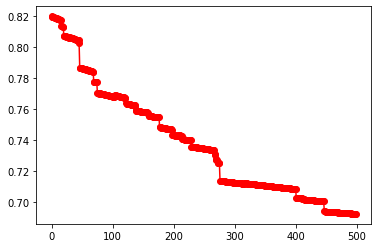

In [5]:
Aini = xtrain_.T
Y = np.array(train_label)
A, nn = forward_pass(Aini, nn_red)

Max_iter = 500
J = np.zeros(Max_iter)
J[0] = cost_Function(A, np.array(train_label))

for i in range(1,Max_iter):
  nn = backward_propagation(A, Y, nn)
  nn = update_params(nn, 0.005)  
  A, nn = forward_pass(Aini, nn)
  J[i] = cost_Function(A, np.array(train_label))

plt.plot(J,"ro-")
  

In [6]:
out = A<0.5*1

In [7]:
ones_nn = (out*1==1)
Y_nn = (Y==1)
zeros_nn = (out*1==0)
Y_nn = (Y==0)

In [8]:
print((Y_nn==zeros_nn).sum()*100/len(Y_nn))

34.44976076555024


In [9]:
print((Y_nn==ones_nn).sum()*100/len(Y_nn))

65.55023923444976


# NN usando sklearn

In [17]:
from sklearn.neural_network import MLPClassifier

X = xtrain_
y = np.array(train_label)
clf = MLPClassifier(solver='lbfgs', learning_rate_init = 0.5, alpha = 3, hidden_layer_sizes=(3,5,5),max_iter = 2000, random_state=1)

clf.fit(X, y)
#MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')

MLPClassifier(alpha=3, hidden_layer_sizes=(3, 5, 5), learning_rate_init=0.5,
              max_iter=2000, random_state=1, solver='lbfgs')

In [18]:
(clf.score(X, y))*100

99.04306220095694

In [19]:
clf.predict(xtest_)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0])

In [20]:
np.array(test_label)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0])

In [21]:
clf.score(xtest_,test_label)*100

70.0

In [22]:
clf.predict_proba(xtest_)

array([[3.75561602e-02, 9.62443840e-01],
       [1.59275757e-01, 8.40724243e-01],
       [2.03329550e-01, 7.96670450e-01],
       [6.23140357e-01, 3.76859643e-01],
       [6.88328641e-01, 3.11671359e-01],
       [2.23263573e-01, 7.76736427e-01],
       [9.99627054e-01, 3.72945833e-04],
       [2.92946810e-01, 7.07053190e-01],
       [3.75624705e-02, 9.62437530e-01],
       [1.00830568e-01, 8.99169432e-01],
       [7.06749510e-01, 2.93250490e-01],
       [2.97594280e-01, 7.02405720e-01],
       [7.29198338e-02, 9.27080166e-01],
       [8.55435066e-01, 1.44564934e-01],
       [9.99955642e-01, 4.43584243e-05],
       [1.49342317e-01, 8.50657683e-01],
       [9.84364788e-01, 1.56352122e-02],
       [3.75710726e-02, 9.62428927e-01],
       [9.96413695e-01, 3.58630527e-03],
       [9.99971167e-01, 2.88333271e-05],
       [4.08168453e-02, 9.59183155e-01],
       [8.79211146e-01, 1.20788854e-01],
       [9.98981116e-01, 1.01888399e-03],
       [6.37584011e-02, 9.36241599e-01],
       [1.345805